# Classification AutoML Default of Credit Card from Taiwan in 2005

### Classification AutoML Objectives:
1. Inspect and Visualize  data
2. Set experiment to record all metrics in MLflow and a local JSON file
3. Creating an AutoML function with hyperparameter optimization
4. Visualize  all model metrics
5. Analyze models based on business costs
6. Save best model separately
7. Visualize  the best model
8. Explainable Artificial Intelligence with Random Forest and LIME
 
Default of credit card clients data is from: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Initial Imports

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import timeit
import joblib
import mlflow
import warnings
warnings.filterwarnings("ignore")

# Loads my user defined functions from custom_classification_functions.py and called using cf
import custom_classification_functions as cf

### Create an experiment with MLflow

In [2]:
# Set experiment name
mlflow.set_experiment('automl_deafult_classification')

INFO: 'automl_deafult_classification' does not exist. Creating a new experiment


### Load Data

In [3]:
# Loading data
file_path = Path("Resources/default_of_credit_card_clients.csv")
default_credit_df = pd.read_csv(file_path)

### Log Dataset for Experiment

In [4]:
# Convert dataframe to dictionary
default_credit_dict = default_credit_df.copy().to_dict()

# saves dictionary as a JSON file in MLflow
with mlflow.start_run(run_name = 'Dataset'):
    mlflow.log_dict(default_credit_dict, 'default_credit_dict.json')

2021/09/15 09:22:58 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 
X2: Gender (1 = male; 2 = female).
 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 
X4: Marital status (1 = married; 2 = single; 3 = others).
 
X5: Age (year).
 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Attribute information is from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [5]:
# Show dataframe
default_credit_df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

### Check & Clean Data

In [6]:
# Check Data Types
default_credit_df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
# Count nulls
default_credit_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Visualize the Data

In [8]:
# Show statistics summary
default_credit_df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]


Bad key "text.kerning_factor" on line 4 in
C:\Users\palex\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


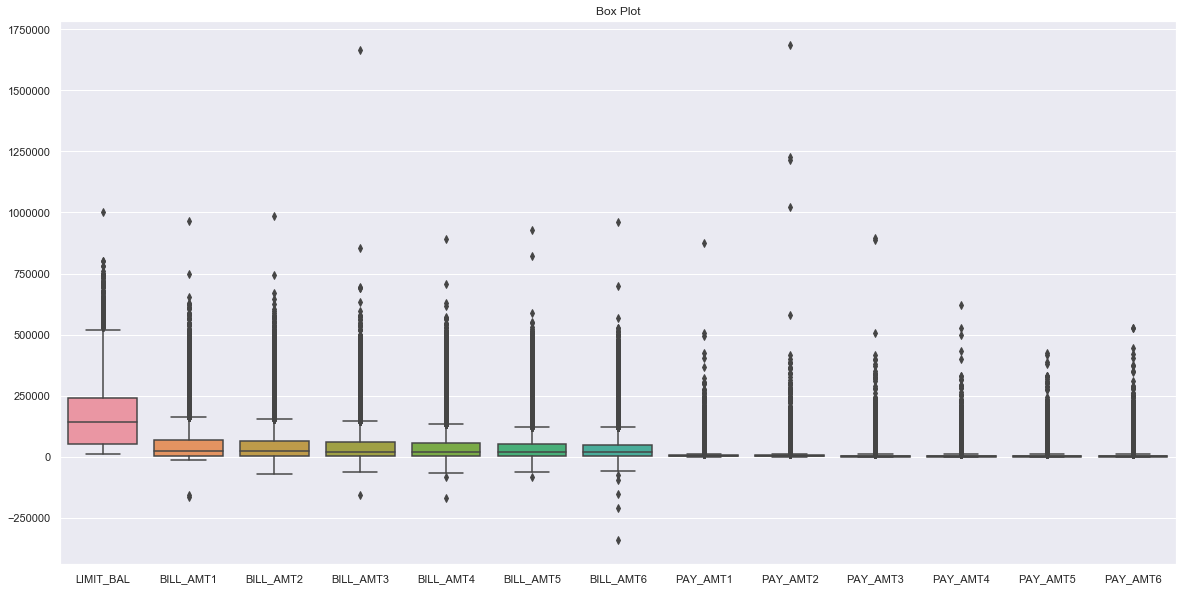

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# dropping descrete columns frome data frame for box plot
columns_remove =  [
    'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
    'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']

# Display Box PLot of data
plt.figure(figsize=(20,10))
sns.boxplot(data = default_credit_df.drop(columns = columns_remove)).set_title('Box Plot');
plt.show()

Occurrences in each group
age_group
0-20         0
21-40    21726
41-55     7430
55-65      758
65+         86
Name: LIMIT_BAL, dtype: int64


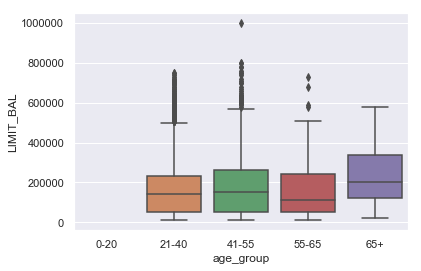

In [10]:
# copy default_credit_df to create age groups for box plot
age_group_default_credit_df = default_credit_df.copy()

#create a new column with name age_group
age_group_default_credit_df['age_group'] = pd.cut(age_group_default_credit_df.AGE, bins=(0,20,40,55, 65, 130),labels=('0-20','21-40','41-55','55-65', '65+'))

# Display number of count of occurrences in each group
print('Occurrences in each group')
print(age_group_default_credit_df.groupby(['age_group']).LIMIT_BAL.count())

# Display Box Plot with ages groups
sns.boxplot(age_group_default_credit_df['age_group'], age_group_default_credit_df['LIMIT_BAL']);

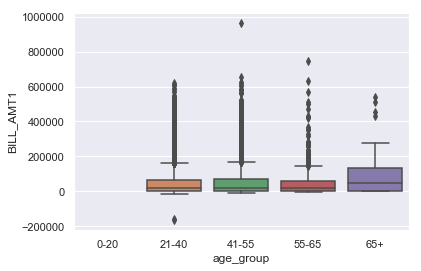

In [11]:
# Box Plot of age group vs BILL_AMT1
sns.boxplot(age_group_default_credit_df['age_group'], age_group_default_credit_df['BILL_AMT1']);

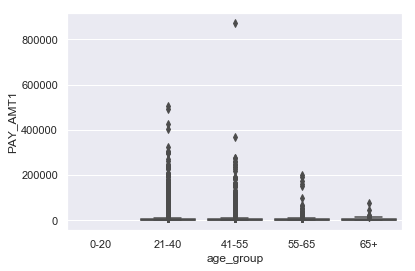

In [12]:
# Box Plot of age group vs PAY_AMT1
sns.boxplot(age_group_default_credit_df['age_group'], age_group_default_credit_df['PAY_AMT1']);

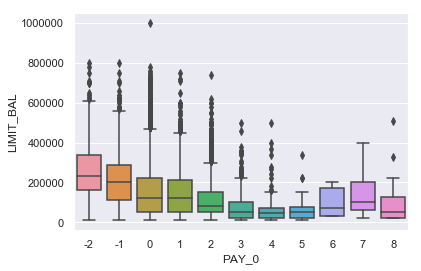

In [13]:
# Box Plot of PAY_0 vs LIMIT_BAL
sns.boxplot(age_group_default_credit_df['PAY_0'], age_group_default_credit_df['LIMIT_BAL']);

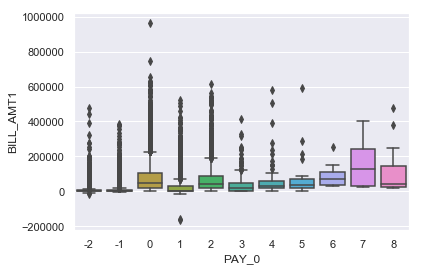

In [14]:
# Box Plot of PAY_0 vs BILL_AMT1
sns.boxplot(default_credit_df['PAY_0'], default_credit_df['BILL_AMT1']);

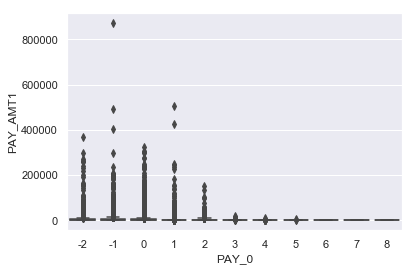

In [15]:
# Box Plot of PAY_0 vs PAY_AMT1
sns.boxplot(default_credit_df['PAY_0'], default_credit_df['PAY_AMT1']);

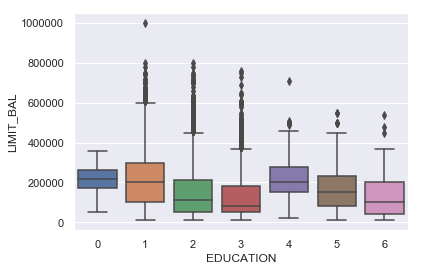

In [16]:
# Box Plot of EDUCATION vs LIMIT_BAL
sns.boxplot(default_credit_df['EDUCATION'], default_credit_df['LIMIT_BAL']);

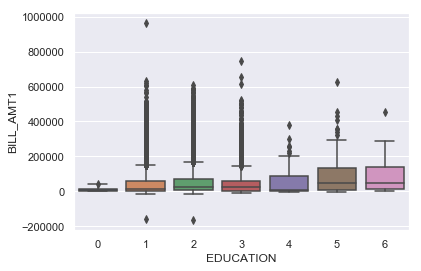

In [17]:
# Box Plot of EDUCATION vs BILL_AMT1
sns.boxplot(default_credit_df['EDUCATION'], default_credit_df['BILL_AMT1']);

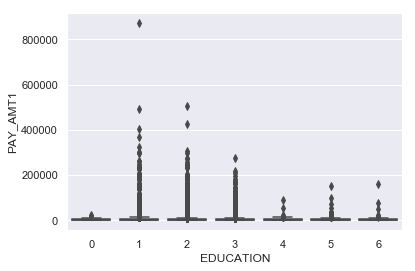

In [18]:
# Box Plot of EDUCATION vs PAY_AMT1
sns.boxplot(default_credit_df['EDUCATION'], default_credit_df['PAY_AMT1']);

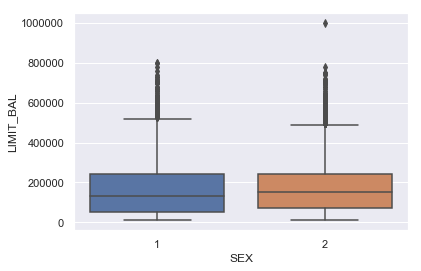

In [19]:
# Box Plot of SEX vs LIMIT_BAL
sns.boxplot(default_credit_df['SEX'], default_credit_df['LIMIT_BAL']);

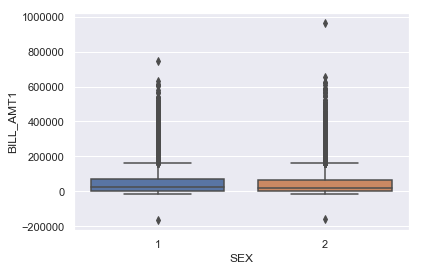

In [20]:
# Box Plot of SEX vs BILL_AMT1
sns.boxplot(default_credit_df['SEX'], default_credit_df['BILL_AMT1']);

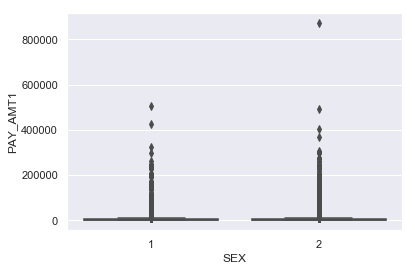

In [21]:
# Box Plot of SEX vs PAY_AMT1
sns.boxplot(default_credit_df['SEX'], default_credit_df['PAY_AMT1']);

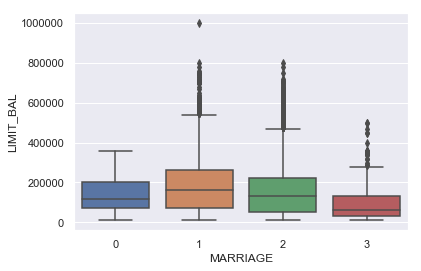

In [22]:
# Box Plot of MARRIAGE vs LIMIT_BAL
sns.boxplot(default_credit_df['MARRIAGE'], default_credit_df['LIMIT_BAL']);

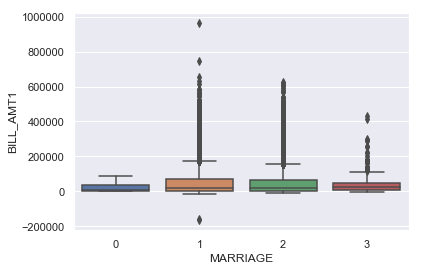

In [23]:
# Box Plot of MARRIAGE vs BILL_AMT1
sns.boxplot(default_credit_df['MARRIAGE'], default_credit_df['BILL_AMT1']);

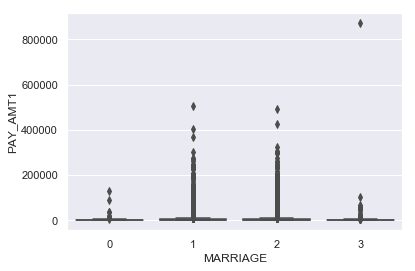

In [24]:
# Box Plot of MARRIAGE vs PAY_AMT1
sns.boxplot(default_credit_df['MARRIAGE'], default_credit_df['PAY_AMT1']);

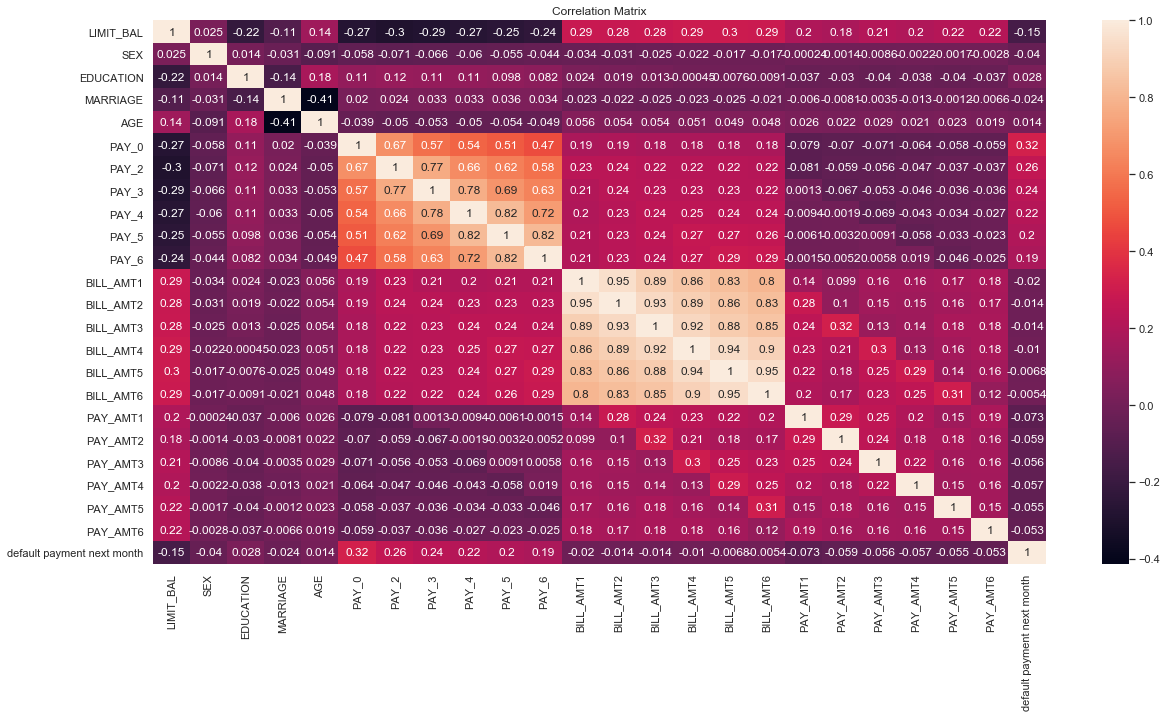

In [25]:
# Display Correlation Matrix
plt.figure(figsize=(20,10))
sns.heatmap(default_credit_df.corr(), annot=True).set_title('Correlation Matrix');
plt.show()

In [26]:
# Show correlations to terget column
round(default_credit_df.corr()['default payment next month'],3)*100

LIMIT_BAL                     -15.4
SEX                            -4.0
EDUCATION                       2.8
MARRIAGE                       -2.4
AGE                             1.4
PAY_0                          32.5
PAY_2                          26.4
PAY_3                          23.5
PAY_4                          21.7
PAY_5                          20.4
PAY_6                          18.7
BILL_AMT1                      -2.0
BILL_AMT2                      -1.4
BILL_AMT3                      -1.4
BILL_AMT4                      -1.0
BILL_AMT5                      -0.7
BILL_AMT6                      -0.5
PAY_AMT1                       -7.3
PAY_AMT2                       -5.9
PAY_AMT3                       -5.6
PAY_AMT4                       -5.7
PAY_AMT5                       -5.5
PAY_AMT6                       -5.3
default payment next month    100.0
Name: default payment next month, dtype: float64

### Feature Selection - Remove least important features from Random Forest with Multicollinearity

In [27]:
# Split data for feature selection 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Select target / label column
label_col = 'default payment next month'

# Select Scaler
# 0 = StandardScaler
# 1 = MinMaxScaler
scaler_obj = 0

# function to clean, separate target/label and scale data to get ready for model
X_scaled, y, scaler, X = cf.label_feature_split_scale_df(
    default_credit_df,
    label_col,
    scaler_obj)

# Check target counts
print('Target Column Counts')
y.value_counts()

Target Column Counts


0    23364
1     6636
Name: default payment next month, dtype: int64

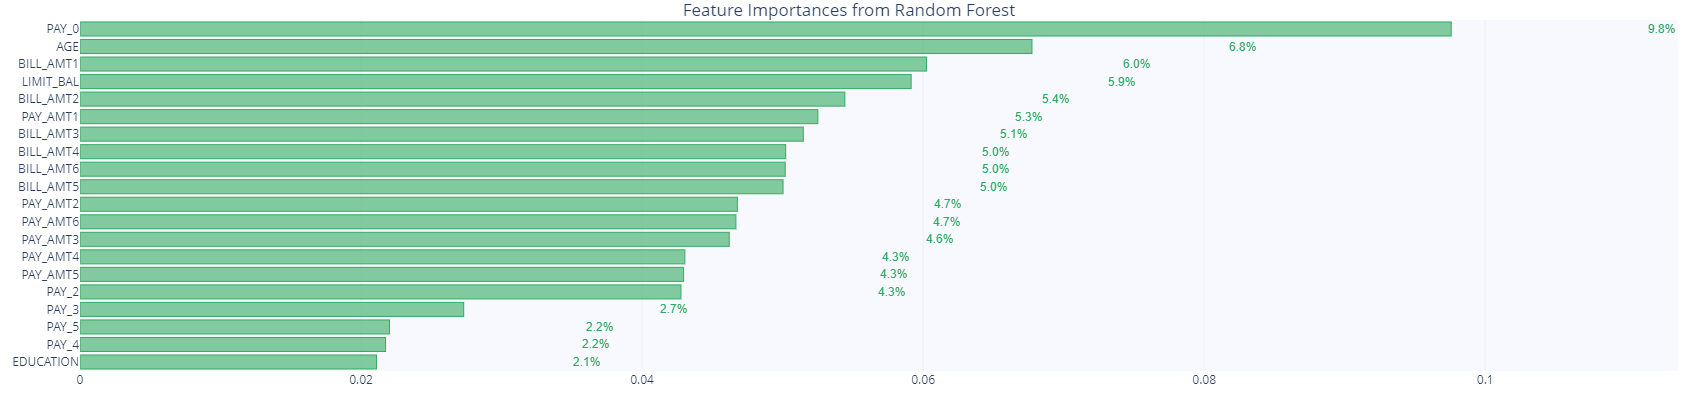

In [28]:
# Random Forest for feature importance


from sklearn.model_selection import train_test_split
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=78)

from sklearn.ensemble import RandomForestClassifier
# Create the random forest classifier instance
model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit model using the training data
model.fit(X_train, y_train)

# Get Feature Importances for Random Forest Model
rf_importances = model.feature_importances_

# Get the list the important features and sort them
rf_importances_sorted = sorted(zip(rf_importances, X.columns), reverse=True)
    
# create data frame of important features
rf_importances_df = pd.DataFrame(rf_importances_sorted)
rf_importances_df.set_index(rf_importances_df[1], inplace=True)
rf_importances_df.drop(columns=1, inplace=True)
rf_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
    
# Shows the maximum amount of features
num_features_show = 20
    
# Best Model Feature Importance Plot
rf_features_importances_plot = cf.feat_import_rf_fig(rf_importances, num_features_show, X)

# Display Best Model Feature Importance Plot
rf_features_importances_plot.show()

In [29]:
# Set minimum significance from Random Forest
rf_sig = .05

# Multicollinearity Threshold
multicol_thresh = .9

# Drop columns that are not significant
default_credit_df = default_credit_df.drop(columns = rf_importances_df[rf_importances_df < rf_sig].dropna().index.values.tolist())

In [30]:
# Show multicollinearity dataframe
cf.multicollinearity_df(default_credit_df, multicol_thresh)

level_0    level_1         0
0  BILL_AMT1  BILL_AMT2  0.951484
1  BILL_AMT2  BILL_AMT3  0.928326
2  BILL_AMT3  BILL_AMT4  0.923969
3  BILL_AMT4  BILL_AMT5  0.940134
4  BILL_AMT4  BILL_AMT6  0.900941
5  BILL_AMT5  BILL_AMT6  0.946197

In [31]:
# Counter
shape = 1

# While loop to remove correlated columns with worse feature importance without double counting and removing extra columns
while shape != 0:

    # Create multicollinearity dataframe
    multicollinearity_df = cf.multicollinearity_df(default_credit_df, multicol_thresh)
    
    # Remove correlated columns with worse feature importance
    if rf_importances_df.loc[multicollinearity_df.loc[0]['level_0']]['Feature Importances'] > rf_importances_df.loc[multicollinearity_df.loc[0]['level_1']]['Feature Importances']:
        default_credit_df.drop(columns = multicollinearity_df.loc[0]['level_1'], inplace = True)
    else:
        default_credit_df.drop(columns = multicollinearity_df.loc[0]['level_0'], inplace = True)

    # Create multicollinearity matrix again to check while loop
    multicollinearity_df = cf.multicollinearity_df(default_credit_df, multicol_thresh)

    # while loop counter
    shape = multicollinearity_df.shape[0]

### Business Requirements and Costs

In [32]:
# Log metrics with MLflow
with mlflow.start_run(run_name = 'Business Parameters'):
    
    # minimum required precision
    min_precision = .30
    mlflow.log_metric('min_precision', min_precision)
    
    # minimum required recall
    min_recall = .30
    mlflow.log_metric('min_recall', min_recall)

    # Type 1 error cost
    type1_cost = 50
    mlflow.log_metric('type1_cost', type1_cost)

    # Type 2 error cost
    type2_cost = 35
    mlflow.log_metric('type2_cost', type2_cost)

    # Run time per hour
    per_hour_cost = 3
    mlflow.log_metric('per_hour_cost', per_hour_cost)

    # Projected number of loans
    proj_laons = 300000 # loans per year and model retrained every year
    mlflow.log_metric('proj_laons', proj_laons)

    # Projected file size in GB
    proj_file_size = 3
    mlflow.log_metric('proj_file_size', proj_file_size)

    import os
    # Get CSV file size and convert to GB
    file_size = os.path.getsize(file_path) / (1024**3)
    mlflow.log_metric('file_size', file_size)

### Separate the Features (X) from the Target/Label (y) and Normalize data

In [33]:
# function to clean, separate target/label and scale data to get ready for model
X_scaled, y, scaler, X = cf.label_feature_split_scale_df(
    default_credit_df,
    label_col,
    scaler_obj)

# Name features
feature_names_list = default_credit_df.columns.to_list()
feature_names_list.remove(label_col)

### Function to record models, performance, sampling methods and hyperparameters for each run

In [34]:
def train_score_model(model, X_train, X_test, y_train, y_test, model_type, sampling, sample_run_time, feature_names_list, opt_lr_param = None, max_depth_param = None):
    """
    Function to record models, performance, sampling methods and hyperparameters for each run in dictionary and MLflow
    """

    
    with mlflow.start_run(run_name = '{} {}'.format(model_type, sampling)):


        import timeit
        # Start timer to calculate costs later
        start = timeit.default_timer()

        # Fit model using the training data
        model.fit(X_train, y_train)

        # calculate accuracy
        y_hat = model.predict(X_test)
        acc = model.score(X_test, y_test)

        from sklearn.metrics import confusion_matrix
        # Create Confusion Matrix
        conf_matx = confusion_matrix(y_test, y_hat)

        # Create a confusion matrix and calculating Recall, Precision and F scores
        precision, recall = cf.prec_recall(y_test, y_hat)

        from sklearn.metrics import roc_auc_score
        # calculate AUC
        y_scores = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_scores[:,1])

        from sklearn.metrics import roc_curve
        # ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
        
         # Get Feature Importances for Random Forest Model
        if model_type == 'RF':
            rf_importances = model.feature_importances_

        # Stop timer
        stop = timeit.default_timer()

        # Calculate runtime
        run_time = stop - start

        # Add metrics to dictionary
        metrics_dict[model_type][sampling]['Accuracy'] = acc
        metrics_dict[model_type][sampling]['Precision'] = precision
        metrics_dict[model_type][sampling]['Recall'] = recall
        metrics_dict[model_type][sampling]['AUC'] = auc
        metrics_dict[model_type][sampling]['fpr'] = fpr.tolist()
        metrics_dict[model_type][sampling]['tpr'] = tpr.tolist()
        metrics_dict[model_type][sampling]['confusion_matrix'] = conf_matx.tolist()
        metrics_dict[model_type][sampling]['y hat (Prediction)'] = y_hat.tolist()
        metrics_dict[model_type][sampling]['model'] = str(model)
        
        # Add MLflow Run Id
        metrics_dict[model_type][sampling]['Run ID'] = mlflow.active_run().info.run_id

        # add run time to metrics to dictionary
        metrics_dict[model_type][sampling]['run_time'] = run_time
        metrics_dict[model_type][sampling]['sample_run_time'] = sample_run_time

        # Calculate average cost per error
        avg_error_cost = ((conf_matx[0][1] * type1_cost
                           + conf_matx[1][0] * type2_cost)
                          /
                          (conf_matx[0][1]
                           + conf_matx[1][0]))

        # Total run time cost for file
        total_rt_cost = ((run_time * (per_hour_cost / (60* 60)))
                         +
                         (sample_run_time * (per_hour_cost / (60* 60))))

        # Projected runtime cost for file
        pro_run_file = (((run_time / file_size)
                         *
                         (per_hour_cost / (60* 60)) * proj_file_size)
                        +
                        ((sample_run_time / file_size)
                         *
                         (per_hour_cost / (60* 60)) * proj_file_size))

        # Projected cost of model errors
        pr_rec_cost_pro_loan = ((proj_laons * type1_cost * (1 - precision))
                                +
                                (proj_laons * type2_cost * (1 - recall)))

        # Total cost of projected model
        pro_total_pro_cost = pr_rec_cost_pro_loan + pro_run_file

        # Add Calculations to dictionary
        metrics_dict[model_type][sampling]['Average Cost per Error'] = avg_error_cost
        metrics_dict[model_type][sampling]['Total Run Time Cost'] = total_rt_cost
        metrics_dict[model_type][sampling]['Projected Run Cost for model'] = pro_run_file
        metrics_dict[model_type][sampling]['Projected Cost for model errors'] = pr_rec_cost_pro_loan
        metrics_dict[model_type][sampling]['Projected Total Cost'] = pro_total_pro_cost
        
        # Add for Local Explanation LIME
        metrics_dict[model_type][sampling]['X_train'] = X_train.tolist()
        metrics_dict[model_type][sampling]['feature_names'] = feature_names_list
        # Select Prediction to View
        i = 10
        # Sample prediction to view
        metrics_dict[model_type][sampling]['Sample prediction'] = X_test[i].tolist()
        

        # Add items to ML Flow
        mlflow.log_metric('Accuracy', acc)
        mlflow.log_metric('Precision', precision)
        mlflow.log_metric('Recall', recall)
        mlflow.log_metric('AUC', auc)
        
        from sklearn.metrics import classification_report
        mlflow.log_param('Classification Report', classification_report(y_test, y_hat)) # param
        mlflow.log_param('Confusion Matrix', conf_matx) # param
        mlflow.log_param('X_train', X_train) # param
        mlflow.log_param('feature_names', feature_names_list) # param
        
        # Add model to MLflow
        mlflow.sklearn.log_model(model, 'model') # Model

        mlflow.log_metric('run_time', run_time)
        mlflow.log_metric('sample_run_time', sample_run_time)
        mlflow.log_metric('Average Cost per Error', avg_error_cost)
        mlflow.log_metric('Total Run Time Cost', total_rt_cost)
        mlflow.log_metric('Projected Run Cost for model', pro_run_file)
        mlflow.log_metric('Projected Cost for model errors', pr_rec_cost_pro_loan)
        mlflow.log_metric('Projected Total Cost', pro_total_pro_cost)

        # Add Metrics to dictionary if Parameters exist for model
        if opt_lr_param != None:
            metrics_dict[model_type][sampling]['Learning Rate'] = opt_lr
            mlflow.log_metric('Learning Rate', opt_lr)
        if max_depth_param != None:
            metrics_dict[model_type][sampling]['Max Depth'] = max_depth
            mlflow.log_metric('Max Depth', max_depth)
            
        # Add Feature Importance for Random Forest
        if model_type =='RF':
            metrics_dict[model_type][sampling]['Feature Importances RF'] = rf_importances.tolist()
            mlflow.log_param('Feature Importances RF', rf_importances) # param

### Auto ML with Over & Under Sampling and Hyperparameter Optimization

In [35]:
# Create an empty dictionary with models for metrics to be stored
metrics_dict = {}
model_list = ['LR', 'SVC', 'RF', 'GBC']
sampling_list = ['No Over or Under sampling', 'SMOTE Oversampling', 'ClusterCentroids Undersampling', 'SMOTEENN Over and Under sampling']
for h in model_list:
    metrics_dict[h] = {}
    for j in sampling_list:
        metrics_dict[h][j] = {}

# for loop to find the differences of the over under sampling
for sampling in sampling_list:
    print()
    print('------------------{}------------------'.format(sampling))
    
    from sklearn.model_selection import train_test_split
    # Split data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.70, random_state=78)
    
    if sampling == 'No Over or Under sampling':
        
        # Start timer to calculate costs later
        start = timeit.default_timer()
        # Stop timer
        stop = timeit.default_timer()
        # Calculate runtime
        sample_run_time = stop - start
    
    elif sampling == 'SMOTE Oversampling':
        
        # Start timer to calculate costs later
        start = timeit.default_timer()
        # SMOTE Oversampling
        # Resample the training data with SMOTE
        from imblearn.over_sampling import SMOTE
        X_train, y_train = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train)
        stop = timeit.default_timer()
        # Calculate runtime
        sample_run_time = stop - start

    elif sampling == 'ClusterCentroids Undersampling':
        
        # Start timer to calculate costs later
        start = timeit.default_timer()
        # ClusterCentroids Undersampling
        from imblearn.under_sampling import ClusterCentroids
        cc = ClusterCentroids(random_state=1)
        X_train, y_train = cc.fit_resample(X_train, y_train)
        stop = timeit.default_timer()
        # Calculate runtime
        sample_run_time = stop - start

    elif sampling == 'SMOTEENN Over and Under sampling':
        # Start timer to calculate costs later
        start = timeit.default_timer()
        # Resample the training data with SMOTEENN
        from imblearn.combine import SMOTEENN
        smote_enn = SMOTEENN(random_state=0)
        X_train, y_train = smote_enn.fit_resample(X_train, y_train)
        stop = timeit.default_timer()
        # Calculate runtime
        sample_run_time = stop - start
        
    else:
        print('Error: No Over or Under sampling selected')


    for model_type in model_list:
        
        print('')
        print('---{}---'.format(model_type))
            
        if model_type == 'LR':
                
            from sklearn.linear_model import LogisticRegression
            # Create and train LR model
            model = LogisticRegression(solver="liblinear")

            # Records run metrics
            train_score_model(model, X_train, X_test, y_train, y_test, model_type, sampling, sample_run_time, feature_names_list, opt_lr_param = None, max_depth_param = None)
                
        elif model_type == 'SVC':
                
            from sklearn.svm import SVC
            # Instantiate a linear SVM model
            model = SVC(kernel='linear', probability = True)
                
            # Records run metrics
            train_score_model(model, X_train, X_test, y_train, y_test, model_type, sampling, sample_run_time, feature_names_list, opt_lr_param = None, max_depth_param = None)
                
        elif model_type == 'RF':
                
            from sklearn.ensemble import RandomForestClassifier
            # Create the random forest classifier instance
            model = RandomForestClassifier(n_estimators=500, random_state=78)
                
            # Records run metrics
            train_score_model(model, X_train, X_test, y_train, y_test, model_type, sampling, sample_run_time, feature_names_list, opt_lr_param = None, max_depth_param = None)
                
        elif model_type == 'GBC':
                
            # hyperparameter tuning for Gradient Boosting Classifier

            # Create an empty df for learning rates and AUC scores
            score_df = pd.DataFrame()

            # Generate an array of learning rate values
            lr_array = np.linspace(.001, 1, num=11)
            
            # Generate an array of learning rate values
            md_array = np.linspace(1, 5, num = 5)

            # hyperparameter optimization - testing the different learning rates and max depth
            for lr in lr_array:
                for md in md_array:
                    from sklearn.ensemble import GradientBoostingClassifier
                    gbc_model = GradientBoostingClassifier(
                        n_estimators = 100,
                        learning_rate = lr,
                        max_depth = md,
                        random_state = 0)

                    # fit model
                    gbc_model.fit(X_train, y_train)

                    from sklearn.metrics import roc_auc_score
                    # calculate AUC
                    gbc_y_scores = gbc_model.predict_proba(X_test)
                    gbc_auc = roc_auc_score(y_test, gbc_y_scores[:,1])

                    # recored_score
                    score_df = score_df.append({'AUC': gbc_auc,
                                            'Learning rate':lr,
                                           'Max Depth': md
                                           }, ignore_index=True)
            
            # optimal learning rate
            opt_lr = score_df.copy().loc[score_df['AUC'] == score_df['AUC'].max()]['Learning rate'].iloc[0]
            
            # optimal Max Depth
            max_depth = score_df.copy().loc[score_df['AUC'] == score_df['AUC'].max()]['Max Depth'].iloc[0]
            
            # Create GradientBoostingClassifier model
            model = GradientBoostingClassifier(
                n_estimators=500,
                learning_rate = opt_lr,
                max_depth = max_depth,
                random_state = 0)
            
            # Records run metrics
            train_score_model(model, X_train, X_test, y_train, y_test, model_type, sampling, sample_run_time, feature_names_list, opt_lr_param = opt_lr, max_depth_param = max_depth)

        else:
            print('Error on model')


------------------No Over or Under sampling------------------

---LR---

---SVC---

---RF---

---GBC---

------------------SMOTE Oversampling------------------

---LR---

---SVC---

---RF---

---GBC---

------------------ClusterCentroids Undersampling------------------

---LR---

---SVC---

---RF---

---GBC---

------------------SMOTEENN Over and Under sampling------------------

---LR---

---SVC---

---RF---

---GBC---


### Save Dictionary Metrics as JSON

In [36]:
import json
# If outputs folder does not exist it will create one
if not os.path.exists("metrics"):
    os.makedirs("metrics")

# Save dictionary as json
with open("metrics/metrics.json", "w") as file:
    json.dump(metrics_dict, file)

### Visualize Performance of all Models

In [37]:
# Create empty dictionary
reformed_dict = {}

# Reformat dictionary into dataframe
for outerKey, innerDict in metrics_dict.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey, innerKey)] = values
        
# Add metrics to pandas dataframe
metrics_df = pd.DataFrame(reformed_dict)

# Create and empty dataframe to show metrics
new_metric_df = pd.DataFrame()

# Add column names to loop through from dictionary
metrics_list = ['Accuracy', 'Precision', 'Recall', 'AUC', 'fpr',
                'tpr', 'confusion_matrix', 'y hat (Prediction)',
                'model', 'run_time', 'sample_run_time',
                'Average Cost per Error', 'Total Run Time Cost',
                'Projected Run Cost for model', 'Run ID', 'Projected Cost for model errors',
                'Projected Total Cost', 'X_train', 'feature_names', 'Sample prediction',
                'Learning Rate', 'Max Depth',
                'Feature Importances RF']

# Convert dictionary into dataframe
for m in metrics_list:
    new_metric_df = pd.concat([new_metric_df, pd.DataFrame(metrics_df.copy().loc[m])], axis = 1)

# Show dictionary as a dataframe
new_metric_df

Accuracy Precision    Recall       AUC  \
LR  No Over or Under sampling         0.814222  0.698499  0.260825  0.710573   
    SMOTE Oversampling                0.678333  0.364061  0.635762  0.712195   
    ClusterCentroids Undersampling    0.531111   0.28639  0.770759  0.701241   
    SMOTEENN Over and Under sampling  0.551889  0.289634   0.72593  0.712764   
SVC No Over or Under sampling         0.781889       NaN         0  0.691664   
    SMOTE Oversampling                0.776556  0.488212  0.506368  0.705956   
    ClusterCentroids Undersampling    0.514778  0.280657  0.783495   0.69484   
    SMOTEENN Over and Under sampling  0.602111  0.315549  0.705043  0.715256   
RF  No Over or Under sampling         0.809333  0.609778  0.349465  0.743025   
    SMOTE Oversampling                0.776444  0.487003  0.467652  0.729842   
    ClusterCentroids Undersampling    0.530444  0.294385  0.825267   0.68006   
    SMOTEENN Over and Under sampling  0.728778  0.417014  0.611819  0.746461   
GBC No Over or Under sampling         0.817222  0.656189  0.340295  0.760112   
    SMOTE Oversampling                0.747111  0.438264   0.56597  0.758391   
    ClusterCentroids Undersampling    0.595889  0.321154  0.765665  0.713253   
    SMOTEENN Over and Under sampling  0.755111  0.452202  0.580744  0.752804   

                                                                                    fpr  \
LR  No Over or Under sampling         [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    SMOTE Oversampling                [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    ClusterCentroids Undersampling    [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    SMOTEENN Over and Under sampling  [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
SVC No Over or Under sampling         [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    SMOTE Oversampling                [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    ClusterCentroids Undersampling    [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    SMOTEENN Over and Under sampling  [0.0, 0.0, 0.0002842120221685377, 0.0002842120...   
RF  No Over or Under sampling         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00014210...   
    SMOTE Oversampling                [0.0, 0.0002842120221685377, 0.000426318033252...   
    ClusterCentroids Undersampling    [0.0, 0.01605797925252238, 0.02501065795083132...   
    SMOTEENN Over and Under sampling  [0.0, 0.006110558476623561, 0.0123632229643313...   
GBC No Over or Under sampling         [0.0, 0.0, 0.0, 0.0004263180332528066, 0.00042...   
    SMOTE Oversampling                [0.0, 0.00881057268722467, 0.00895267869830893...   
    ClusterCentroids Undersampling    [0.0, 0.0, 0.00014210601108426886, 0.000142106...   
    SMOTEENN Over and Under sampling  [0.0, 0.0, 0.00014210601108426886, 0.000142106...   

                                                                                    tpr  \
LR  No Over or Under sampling         [0.0, 0.0005094243504839531, 0.000509424350483...   
    SMOTE Oversampling                [0.0, 0.0005094243504839531, 0.000509424350483...   
    ClusterCentroids Undersampling    [0.0, 0.0005094243504839531, 0.000509424350483...   
    SMOTEENN Over and Under sampling  [0.0, 0.0005094243504839531, 0.000509424350483...   
SVC No Over or Under sampling         [0.0, 0.0005094243504839531, 0.000509424350483...   
    SMOTE Oversampling                [0.0, 0.0005094243504839531, 0.000509424350483...   
    ClusterCentroids Undersampling    [0.0, 0.0005094243504839531, 0.000509424350483...   
    SMOTEENN Over and Under sampling  [0.0, 0.0005094243504839531, 0.000509424350483...   
RF  No Over or Under sampling         [0.0, 0.0005094243504839531, 0.002547121752419...   
    SMOTE Oversampling                [0.0, 0.0015282730514518594, 0.003056546102903...   
    ClusterCentroids Undersampling    [0.0, 0.029546612328069283, 0.0427916454406520...   
    SMOTEENN Over and Under sampling 

In [38]:
# Sort by cost efficency
new_metric_df['Projected Total Cost'].sort_values()

GBC  No Over or Under sampling           1.20841e+07
LR   No Over or Under sampling           1.22838e+07
RF   ClusterCentroids Undersampling      1.24193e+07
GBC  SMOTEENN Over and Under sampling    1.26192e+07
     ClusterCentroids Undersampling      1.26436e+07
RF   No Over or Under sampling            1.2684e+07
     SMOTEENN Over and Under sampling    1.28207e+07
SVC  SMOTE Oversampling                  1.28601e+07
GBC  SMOTE Oversampling                  1.29834e+07
SVC  ClusterCentroids Undersampling      1.30638e+07
LR   ClusterCentroids Undersampling      1.31115e+07
RF   SMOTE Oversampling                  1.32846e+07
LR   SMOTE Oversampling                  1.33636e+07
SVC  SMOTEENN Over and Under sampling    1.33639e+07
LR   SMOTEENN Over and Under sampling    1.35332e+07
SVC  No Over or Under sampling                   NaN
Name: Projected Total Cost, dtype: object

In [39]:
# Sort by AUC
new_metric_df['AUC'].sort_values(ascending = False)

GBC  No Over or Under sampling           0.760112
     SMOTE Oversampling                  0.758391
     SMOTEENN Over and Under sampling    0.752804
RF   SMOTEENN Over and Under sampling    0.746461
     No Over or Under sampling           0.743025
     SMOTE Oversampling                  0.729842
SVC  SMOTEENN Over and Under sampling    0.715256
GBC  ClusterCentroids Undersampling      0.713253
LR   SMOTEENN Over and Under sampling    0.712764
     SMOTE Oversampling                  0.712195
     No Over or Under sampling           0.710573
SVC  SMOTE Oversampling                  0.705956
LR   ClusterCentroids Undersampling      0.701241
SVC  ClusterCentroids Undersampling       0.69484
     No Over or Under sampling           0.691664
RF   ClusterCentroids Undersampling       0.68006
Name: AUC, dtype: object

In [40]:
# Sort by Precision
new_metric_df['Precision'].sort_values(ascending = False)

LR   No Over or Under sampling           0.698499
GBC  No Over or Under sampling           0.656189
RF   No Over or Under sampling           0.609778
SVC  SMOTE Oversampling                  0.488212
RF   SMOTE Oversampling                  0.487003
GBC  SMOTEENN Over and Under sampling    0.452202
     SMOTE Oversampling                  0.438264
RF   SMOTEENN Over and Under sampling    0.417014
LR   SMOTE Oversampling                  0.364061
GBC  ClusterCentroids Undersampling      0.321154
SVC  SMOTEENN Over and Under sampling    0.315549
RF   ClusterCentroids Undersampling      0.294385
LR   SMOTEENN Over and Under sampling    0.289634
     ClusterCentroids Undersampling       0.28639
SVC  ClusterCentroids Undersampling      0.280657
     No Over or Under sampling                NaN
Name: Precision, dtype: object

In [41]:
# Sort by Recall
new_metric_df['Recall'].sort_values(ascending = False)

RF   ClusterCentroids Undersampling      0.825267
SVC  ClusterCentroids Undersampling      0.783495
LR   ClusterCentroids Undersampling      0.770759
GBC  ClusterCentroids Undersampling      0.765665
LR   SMOTEENN Over and Under sampling     0.72593
SVC  SMOTEENN Over and Under sampling    0.705043
LR   SMOTE Oversampling                  0.635762
RF   SMOTEENN Over and Under sampling    0.611819
GBC  SMOTEENN Over and Under sampling    0.580744
     SMOTE Oversampling                   0.56597
SVC  SMOTE Oversampling                  0.506368
RF   SMOTE Oversampling                  0.467652
     No Over or Under sampling           0.349465
GBC  No Over or Under sampling           0.340295
LR   No Over or Under sampling           0.260825
SVC  No Over or Under sampling                  0
Name: Recall, dtype: object

### Show Best model after business requirements and costs are taken into account

In [42]:
# Copy Dataframe to filter requirements
filtered_df = new_metric_df.copy()

# Filter out minimum Precision
filtered_df = filtered_df[filtered_df['Precision'] > min_precision]

# Filter out minimum Recall
filtered_df = filtered_df[filtered_df['Recall'] > min_recall]

In [43]:
# Get best model from Dictionary
best_model_df = filtered_df.copy()[filtered_df['Projected Total Cost'] == filtered_df['Projected Total Cost'].min()]

# Display best model
best_model_df

Accuracy Precision    Recall       AUC  \
GBC No Over or Under sampling  0.817222  0.656189  0.340295  0.760112   

                                                                             fpr  \
GBC No Over or Under sampling  [0.0, 0.0, 0.0, 0.0004263180332528066, 0.00042...   

                                                                             tpr  \
GBC No Over or Under sampling  [0.0, 0.0005094243504839531, 0.001528273051451...   

                                         confusion_matrix  \
GBC No Over or Under sampling  [[6687, 350], [1295, 668]]   

                                                              y hat (Prediction)  \
GBC No Over or Under sampling  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, ...   

                                                                           model  \
GBC No Over or Under sampling  GradientBoostingClassifier(learning_rate=0.200...   

                              run_time  ... Projected Run Cost for model  \
GBC No Over or Under sampling  10.1129  ...                      9.94992   

                                                         Run ID  \
GBC No Over or Under sampling  d95b2f06157348f5bd986bedaa39f2a7   

                              Projected Cost for model errors  \
GBC No Over or Under sampling                     1.20841e+07   

                              Projected Total Cost  \
GBC No Over or Under sampling          1.20841e+07   

                                                                         X_train  \
GBC No Over or Under sampling  [[2.1003863659900275, 0.05581622149827576, 0.0...   

                                                                   feature_names  \
GBC No Over or Under sampling  [LIMIT_BAL, AGE, PAY_0, BILL_AMT1, BILL_AMT3, ...   

                                                               Sample prediction  \
GBC No Over or Under sampling  [-0.982572216860082, -0.9205608309497002, 0.90...   

                              Learning Rate Max Depth Feature Importances RF  
GBC No Over or Under sampling        0.2008         2                    NaN  

[1 rows x 23 columns]

### Save Best Model DataFrame as JSON

In [44]:
# If best_model folder does not exist it will create one
if not os.path.exists("best_model"):
    os.makedirs("best_model")

# Save Best Model Dataframe as CSV
best_model_df.to_csv("best_model/best_model_df.csv")

# Save Best Model Dataframe a CSV file in MLflow
with mlflow.start_run(run_name = 'Best Model CSV'):
    mlflow.log_artifact('best_model/best_model_df.csv')

### Vizualize Best Model

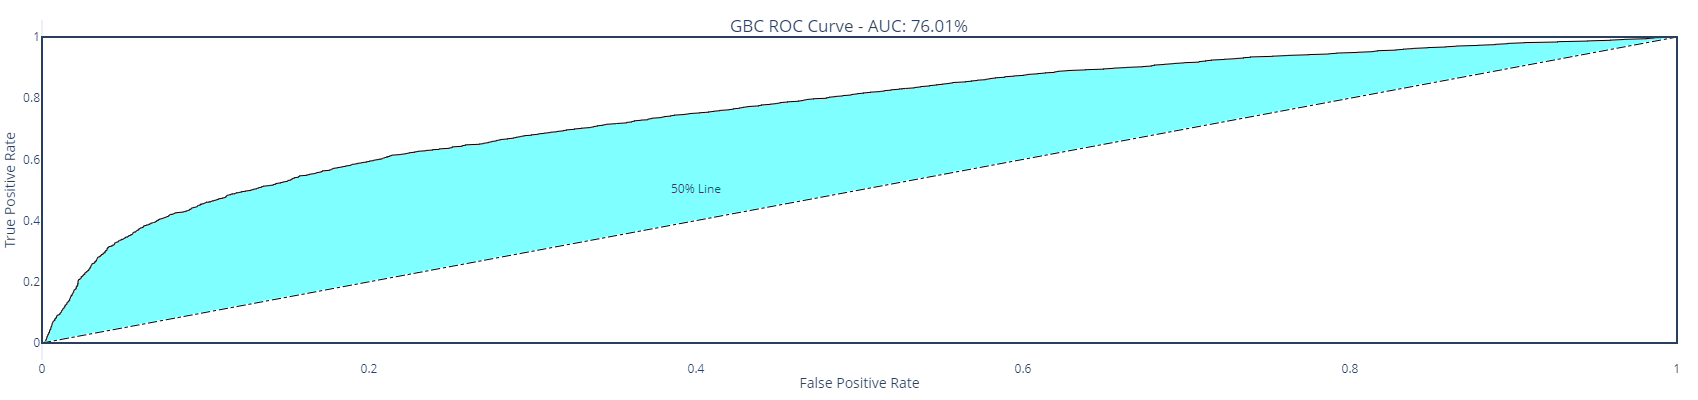

In [45]:
# Best Model AUC Plot
best_model_roc_plt = cf.roc_fig(best_model_df.reset_index().loc[0]['fpr'],
           best_model_df.reset_index().loc[0]['tpr'],
           best_model_df.reset_index().loc[0]['level_0'],
           best_model_df.reset_index().loc[0]['AUC'])

# Display Best Model AUC Plot
best_model_roc_plt.show()

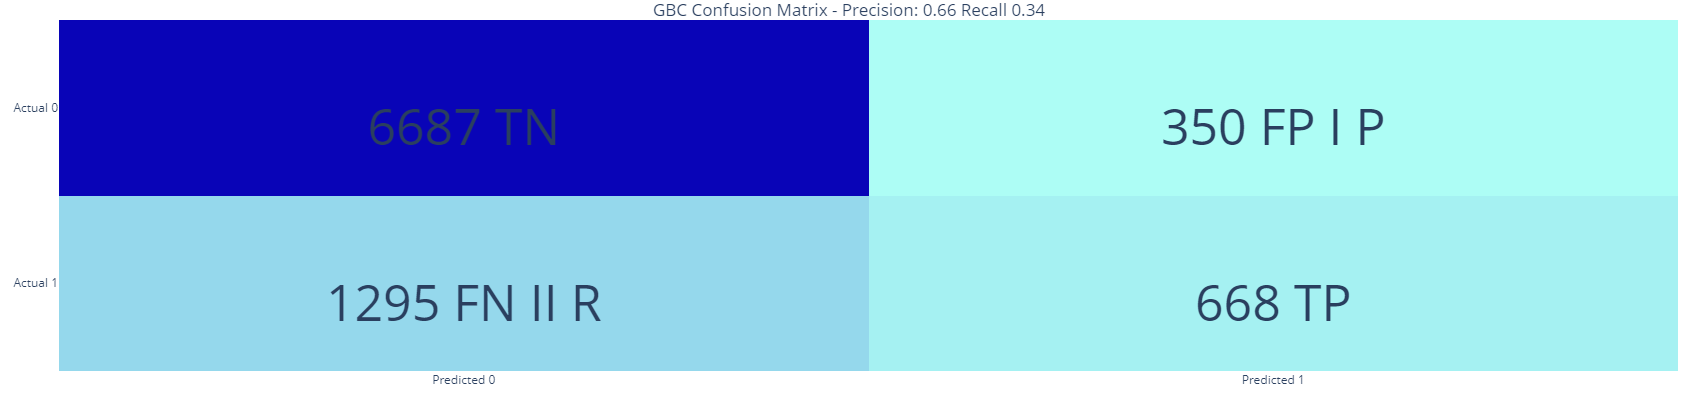

In [46]:
# Create a dataframe of the Confusion Matrix from best model
conf_matx_df = pd.DataFrame(best_model_df.reset_index().loc[0]['confusion_matrix'], index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1'])

# Best model Confusion Matrix Plot
best_conf_matx_plot = cf.conf_matx_fig(conf_matx_df,
                 best_model_df.reset_index().loc[0]['level_0'],
                 best_model_df.reset_index().loc[0]['Precision'],
                 best_model_df.reset_index().loc[0]['Recall'])

# Display Best Model Confusion Matrix Plot
best_conf_matx_plot.show()

In [47]:
from sklearn.metrics import classification_report

# Name the classes
target_names = ["Default", "No Default"]

# Create Classification Report for Best Model
best_class_report = classification_report(y_test,
                            best_model_df.reset_index().loc[0]['y hat (Prediction)'],
                            target_names=target_names)

# Display Classification Report
print(best_class_report)

              precision    recall  f1-score   support

     Default       0.84      0.95      0.89      7037
  No Default       0.66      0.34      0.45      1963

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



### Global Explanation - Understanding Global Predictions with Random Forest

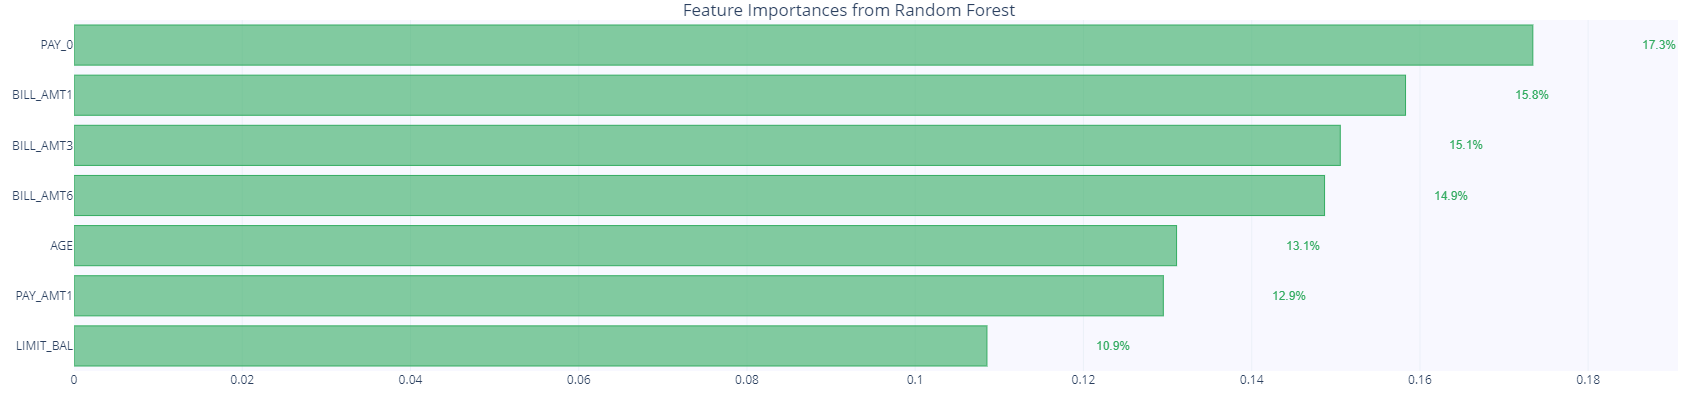

In [48]:
# Feature Importance for Best Model If Random Forest
if best_model_df.reset_index().loc[0]['level_0'] == 'RF':

    # Load Feature Importances from Best Random Forest Model
    rf_importances = best_model_df.reset_index().loc[0]['Feature Importances RF']
    
    # Shows the maximum amount of features
    num_features_show = 20
    
    # Best Model Feature Importance Plot
    rf_features_importances_plot = cf.feat_import_rf_fig(rf_importances, num_features_show, X)

    # Display Best Model Feature Importance Plot
    rf_features_importances_plot.show()
    
else:
    # Load Feature Importances from Best Random Forest Model
    rf_importances = metrics_dict['RF'][best_model_df.reset_index()['level_1'][0]]['Feature Importances RF']
    
    # Shows the maximum amount of features
    num_features_show = 20
    
    # Best Model Feature Importance Plot
    rf_features_importances_plot = cf.feat_import_rf_fig(rf_importances, num_features_show, X)
    
    # Display Best Model Feature Importance Plot
    rf_features_importances_plot.show()

### Local Explanation - Understanding Individual Predictions with LIME

In [49]:
import lime
import lime.lime_tabular

# Setup to Explain Instance of Prediction
explainer = lime.lime_tabular.LimeTabularExplainer(
    np.array(best_model_df.iloc[0]['X_train']),
    feature_names=best_model_df.iloc[0]['feature_names'],
    class_names = target_names,
    mode = 'classification')

In [50]:
# Explain Instance of Prediction
exp = explainer.explain_instance(np.array(best_model_df.iloc[0]['Sample prediction']), model.predict_proba, num_features = 5)

In [51]:
# Display Explaination of Instance Prediction in a Dashboard
exp.show_in_notebook(show_table=True, show_all=False)